In [626]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons,make_blobs
from sklearn.metrics import accuracy_score

A couple of helper functions we can use:

In [627]:
def sample_2d_gaussian(meanx,meany,variance_x,variance_y,covariance,numsamps):
    '''
    Generates a random sample of size 'numsamps' from a 2-dimensional Gaussian distribution.
    The Gaussian is defined by the mean vector (meanx,meany) and the 
    covariance matrix
    
    variance_x    covariance
    covariance    variance_y
    
    All parameters can be freely chosen, except covariance, which must satisfy the inequality
    
    covariance <= sqrt(variance_x * variance_y)
    '''
    meanvec = np.array([meanx,meany])
    covarmatrix = np.array([[variance_x,covariance],[covariance,variance_y]])
    return multivariate_normal(meanvec,covarmatrix,numsamps)


def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single prediction)
    '''
    return np.argmax(A,axis=1)
    

### Part 1: Decision regions for simple 2 dimensional datasets

Loading/generating data: following are several alternative ways to get data consisting of the input features stored in 'features', and the class labels, stored in 'labels'.  Only execute one of the data generating cells, before moving on to the following code!

**A**: sampling data from 2-dimensional Gaussian distributions. For reproducibility, one can fix a random seed.

np.random.seed(1)
datasize=250
mixturecoeff=np.array([0.4,0.2,0.4])
componentsizes=(datasize*mixturecoeff).astype(int)

# class0samp=sample_2d_gaussian(2,3,0.5,0.5,0.45,componentsizes[0])
# class1samp=sample_2d_gaussian(5,3,1.0,0.5,-0.45,componentsizes[1])
# class2samp=sample_2d_gaussian(3,2,0.5,0.5,0,componentsizes[2])

class0samp=sample_2d_gaussian(50,3,8.0,8.0,1.0,componentsizes[0])
class1samp=sample_2d_gaussian(40,8,1.4,0.5,-0.45,componentsizes[1])
class2samp=sample_2d_gaussian(30,2,0.6,0.5,0,componentsizes[2])

  
  
features=np.concatenate((class0samp,class1samp,class2samp),axis=0)
labels=np.concatenate((np.zeros(componentsizes[0]),np.ones(componentsizes[1]),2*np.ones(componentsizes[2])))         

**B**: Loading mi.txt data:

In [628]:
midata = pd.read_csv("MI-labeled.txt", sep=',')
features = np.array(midata[['X1','X2']])
classlabels=midata['Class']
labels = np.zeros(len(classlabels))
for i in range(len(classlabels)):
    if classlabels[i] == 'I':
        labels[i]=1

Preparing meshgrid for plotting decision regions:

In [629]:
maxvalx = np.max(features[:,0])
maxvaly = np.max(features[:,1])
minvalx = np.min(features[:,0])
minvaly = np.min(features[:,1])
border=2
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))
      

Learning a classifier -- uncomment to select the classification model to use.

In [630]:
model=GaussianNB()
#model=LinearDiscriminantAnalysis()
#model = LogisticRegression()
#model = SVC(kernel='linear')

model.fit(features,labels)

GaussianNB()

Applying model to the meshgrid. All models return a quantitative "likelihood" for the different classes. For the probabilistic models, these are class label probabilities that are retrieved using the `.predict_proba` method. For the non-probabilistic SVC model, this is the `decision_function` method. In all cases, we classify a datapoint as belonging to the class with the maximal "likelihood" value.

In [631]:
Z=model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
#Z=model.decision_function(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)
#meshclasses = np.ones(Z.size)
#meshclasses[Z<0]=0
meshclasses = meshclasses.reshape(xx.shape)

In [632]:
Z.shape


(160000, 2)

Plotting datapoints and decision regions

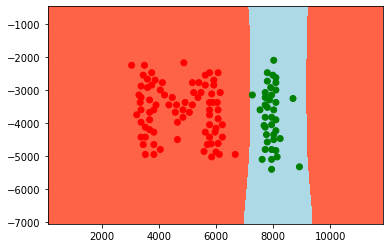

In [633]:
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

We also calculate the predictions on the (training) datapoints, and check the accuracy:

In [634]:
pred_labels=model.predict(features)
print("Accuracy: {}".format(accuracy_score(labels,pred_labels)))

Accuracy: 1.0


**Exercise 1**: Experiment with the three classifiers Gaussian Naive Bayes, Linear Discriminant Analysis, Logistic Regression, and linear support vector machines. Use the MI data, and different mixtures of Gaussians you create by varying the parameters in `sample_2d_gaussian'. 

For the Gaussian mixture data:

Create one or several linearly separable Gaussian mixture datasets (can be with only two components) for which some of the models give a perfect separation of the classes, and others don't. 

Create separate test sets using the same parameters for the Gaussian mixture as in the creation of the training set. Can you create a test/train dataset and find classifiers A and B, such that A is better than B on the training data, but B is better than A on the test set? Why is this not such an easy task for the datasets and classifiers we consider her?

For the MI data:

explain the structure of the decision regions you find for the different classifiers.


The decision boudaries for the gaussian are somewhat rounded while the other are more straight lines:
![Gaussian](imgs/Gaussian2.png)

The three other look more or less the same, the only real diffrence being in some of the region sizes:
Linear regression:

![LinReg](imgs/LinReg2.png)
Logitic regression:

![LogReg](imgs/LogReg2.png)
SVM:

![LinSVC](imgs/LinSVC2.png)

Here is a dataset where the linear discriminant analysis cannot separate the classes.
But where the other models can.
LDA:
![LDA](imgs/LDA_FAIL2.png)
An example of a perfect separation can be seen here with the Gaussian classifier:
![Gaussian_perfect](imgs/Gaussian_succ2.png)

For the test data if the gaussian data for the data uses the same parameters it will not be be noticeably different. But if the variance was high enough it would probably find some edge cases where one was better than the other.

#### MI Data

The distribution the MI data Works on all of the classifiers except for LDA, where the others perfectly separate the classes.

The reason for this could be that the LDA assumes that the data will always have the same variance, but this is not the case for this dataset. So because of this the LDA cannot separate the classes, perfectly.

### Part 2: the Boston Housing data

We next investigate some "real" data: the Boston housing dataset contains information on different socio-economic features in different areas around Boston, and the median house value in these areas. The usual machine learning problem for this dataset is the regression problem of predicting the median value. We can turn it into a binary prediction problem whether the median value is above the median (of the median values). 

The `load_boston` function returns the dataset in the form of a dictionary with attributes DESCR, data, and target.

In [635]:
from sklearn.datasets import load_boston
bostondata = load_boston() 
print(bostondata.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\Jeppe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

We generate our labels, and create a train/test split:

In [636]:
labels = np.array([1 if y > np.median(bostondata['target']) else 0 for y in bostondata['target']])
features = bostondata['data']
features_train,features_test,labels_train,labels_test = train_test_split(features,labels)

Selecting a model class, learning, and measuring accuracy:

In [637]:
models = {
    "GaussianNB":GaussianNB(),
    "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC(kernel='linear'),
}

for model_name, model in models.items():
    model.fit(features_train,labels_train)
    pred_labels_train=model.predict(features_train)
    pred_labels_test=model.predict(features_test)

    print(model_name)
    print(" - Accuracy train: {}".format(accuracy_score(labels_train,pred_labels_train)))
    print(" - Accuracy test: {}".format(accuracy_score(labels_test,pred_labels_test)))

GaussianNB
 - Accuracy train: 0.7598944591029023
 - Accuracy test: 0.7795275590551181
LinearDiscriminantAnalysis
 - Accuracy train: 0.8337730870712401
 - Accuracy test: 0.8740157480314961
LogisticRegression
 - Accuracy train: 0.8522427440633246
 - Accuracy test: 0.8503937007874016


C:\Users\Jeppe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC
 - Accuracy train: 0.8601583113456465
 - Accuracy test: 0.8818897637795275


The models are more or less the same, and in terms of accuracy on the training and testing data, the actually best models is the SVC and the linear regression. Though this changes from run to run.

**Exercise 2**: Try the different models on the Boston housing data. Which one is doing best in terms of test accuracy?

Inspect the following attributes of the learned models:

GaussianNB: `theta_`, `sigma_` <br>
LDA: `means_` <br>
Logistic regression: `coef_` <br>
SVC: `coef_`<br>

Check the online documentation about the meaning of these attributes. How can the values of these attributes be used for explaining the classification model? Which of the input features are most important for the prediction? 

For this investigation it may be helpful to normalize the data before building the classifiers, using the code in the cell below (why is this useful?).



In [641]:
for model_name, model in models.items():
    print(model_name)
    if("GaussianNB" in model_name):
        print("Theta_:"+ str(model.theta_))
        print("Sigma_:"+ str(model.var_))
    if("LinearDiscriminantAnalysis" in model_name):
        print("Means_:"+ str(model.means_))
    if("LogisticRegression" in model_name):
        print("Coefficients_:"+ str(model.coef_))
    if("SVC" in model_name):
        print("Coefficients_:"+ str(model.coef_))
    print("____________________________")

GaussianNB
Theta_:[[ 0.33147444 -0.32902956  0.47713023 -0.09749975  0.4756458  -0.51310001
   0.48944442 -0.32072039  0.34428745  0.42137961  0.47648238 -0.32526046
   0.68044259]
 [-0.30623527  0.30397654 -0.44080052  0.09007591 -0.43942912  0.47403148
  -0.45217708  0.29630005 -0.31807267 -0.38929487 -0.44020199  0.30049444
  -0.62863224]]
Sigma_:[[1.78862797 0.34965941 0.81754389 0.65769846 1.01241966 0.50326563
  0.55166691 0.86274011 1.25308167 1.09146305 0.6492106  1.76881953
  0.83721166]
 [0.07613064 1.40840327 0.76393916 1.29934192 0.58641543 0.99098056
  0.98841639 0.94398544 0.55550985 0.59990973 0.92055326 0.10168416
  0.32746666]]
____________________________
LinearDiscriminantAnalysis
Means_:[[ 0.33147444 -0.32902956  0.47713023 -0.09749975  0.4756458  -0.51310001
   0.48944442 -0.32072039  0.34428745  0.42137961  0.47648238 -0.32526046
   0.68044259]
 [-0.30623527  0.30397654 -0.44080052  0.09007591 -0.43942912  0.47403148
  -0.45217708  0.29630005 -0.31807267 -0.389294

- Theta_: mean of each feature per class.
- Sigma_: variance of each feature per class.
- Means_: mean of each feature per class.
- Coef_: coefficients of each feature per class.

In [642]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)
features_train_norm=scaler.transform(features_train)
features_test_norm=scaler.transform(features_test)

In [643]:
models = {
    "GaussianNB":GaussianNB(),
    "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC(kernel='linear'),
}

for model_name, model in models.items():
    model.fit(features_train_norm,labels_train)
    pred_labels_train=model.predict(features_train_norm)
    pred_labels_test=model.predict(features_test_norm)

    print(model_name)
    print(" - Accuracy train: {}".format(accuracy_score(labels_train,pred_labels_train)))
    print(" - Accuracy test: {}".format(accuracy_score(labels_test,pred_labels_test)))

GaussianNB
 - Accuracy train: 0.7598944591029023
 - Accuracy test: 0.7795275590551181
LinearDiscriminantAnalysis
 - Accuracy train: 0.8337730870712401
 - Accuracy test: 0.8740157480314961
LogisticRegression
 - Accuracy train: 0.8654353562005277
 - Accuracy test: 0.889763779527559
SVC
 - Accuracy train: 0.8759894459102903
 - Accuracy test: 0.8818897637795275
